In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import test_scalar
import numpy as np

## Direct

0.23572448

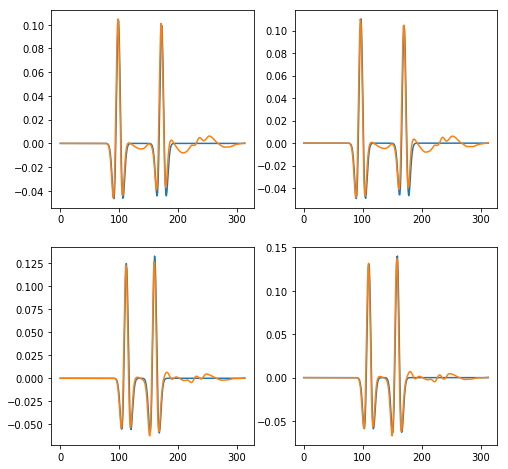

In [2]:
y = test_scalar.run_direct_3d(propagator=test_scalar.scalarprop,
                              dt=0.002,
                              prop_kwargs={'pml_width': 20})

fig, ax = plt.subplots(2,2, figsize=(8,8))
for shot in range(2):
    for receiver in range(2):
        ax[shot][receiver].plot(y[0][:, shot, receiver].numpy())
        ax[shot][receiver].plot(y[1][:, shot, receiver].numpy())
diff = (y[0] - y[1]).numpy().ravel()
np.linalg.norm(diff)

## Scatter

0.0043572253

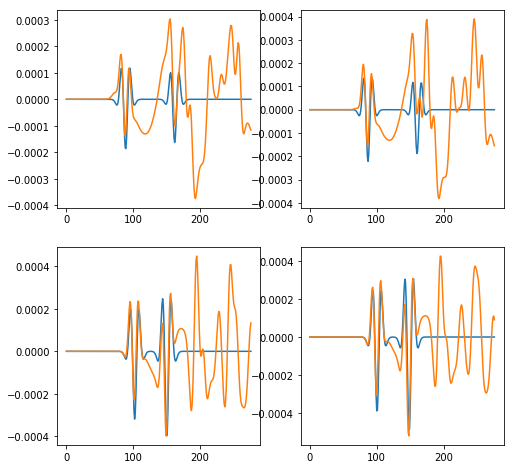

In [3]:
y = test_scalar.run_scatter_3d(propagator=test_scalar.scalarprop,
                               dt=0.002,
                               prop_kwargs={'pml_width': 30})

fig, ax = plt.subplots(2,2, figsize=(8,8))
for shot in range(2):
    for receiver in range(2):
        ax[shot][receiver].plot(y[0][:, shot, receiver].numpy())
        ax[shot][receiver].plot(y[1][:, shot, receiver].numpy())
diff = (y[0] - y[1]).numpy().ravel()
np.linalg.norm(diff)

## Grad

1.7867791e-09

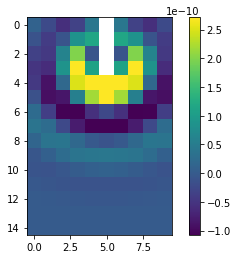

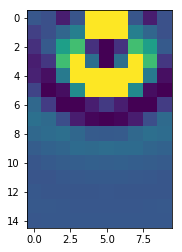

In [6]:
y = test_scalar.run_model_grad_3d(propagator=test_scalar.scalarprop,
                                  dt=0.004,
                                  prop_kwargs={'pml_width': 20})

ny = y[0].shape[2]
hny = int(ny/2)
vmin, vmax = np.nanpercentile(y[0].numpy(), [2,98])
plt.imshow(y[0][0,:,hny,:].numpy(), vmin=vmin, vmax=vmax)
plt.colorbar();
plt.figure()
plt.imshow(y[1][0,:,hny,:].numpy(), vmin=vmin, vmax=vmax)
diff = (y[0]-y[1]).numpy().ravel()
np.linalg.norm(diff[np.where(~np.isnan(diff))])

## Source grad

0.5153857
2.304101e-06


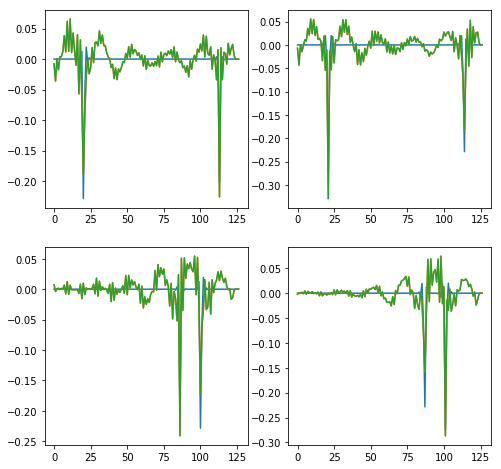

In [2]:
y = test_scalar.run_source_grad_3d(propagator=test_scalar.scalarprop,
                                   dt=0.004, nx=(10, 5, 5),
                                   calc_true_grad=True)

fig, ax = plt.subplots(2, 2, figsize=(8,8))
for shot in range(2):
    for receiver in range(2):
        ax[shot][receiver].plot(y[0][:, shot, receiver].numpy())
        ax[shot][receiver].plot(y[1][:, shot, receiver].numpy())
        ax[shot][receiver].plot(y[2][:, shot, receiver].numpy())
diff = (y[0] - y[1]).numpy().ravel()
print(np.linalg.norm(diff))
diff = (y[2] - y[1]).numpy().ravel()
print(np.linalg.norm(diff))